## Robust linear regression
#### Nils Lennier Mattiß, Federica Valeau, Eduard Mihai
#### 2.1
From the following plot we can notice how different are the least square function and the Cauchy function. The first one gives much more importance to the errors while the second one is more robust.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

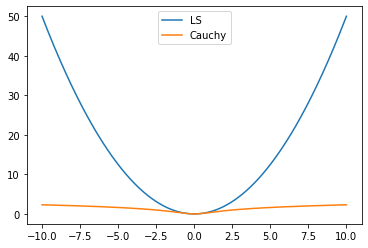

In [2]:
def LS(x):
    return 0.5*x**2

def cauchy(x):
    return 0.5* np.log(1+x**2)

x = np.linspace(-10, 10, 1000)
plt.plot(x, LS(x), label='LS')
plt.plot(x, cauchy(x), label='Cauchy')
plt.legend()
plt.show()


#### 2.2
Now we will find the weights using the Cauchy error function (with c = 1) and by backtracking.

$ Q = \frac{1}{2} \sum_{i=i}^m \log [1+(\hat{y_i}-y_i)^2] =  \frac{1}{2} \sum_{i=i}^m \log [1+(w_0 x_i+w_1-y_i)^2]$

And the partial derivatives will be:

$ \frac{\partial Q}{\partial w_0} = \sum_{i=1}^m \frac{(w_0 x_i+w_1-y_i)x_i}{1+(w_0 x_i+w_1-y_i)^2} \\
\frac{\partial Q}{\partial w_1} = \sum_{i=1}^m \frac{(w_0 x_i+w_1-y_i)}{1+(w_0 x_i+w_1-y_i)^2} \\
\nabla Q(w) = \Big(\frac{\partial Q}{\partial w_0}, \frac{\partial Q}{\partial w_1} \Big)$

The weights will be estimated by the backtraking algorithm

$ w^{k+1} = w^k - \alpha^k \nabla Q(W) $

In [9]:
import numpy as np
import math

m = [0.,0.]
angle = 45*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
points = np.random.multivariate_normal(m,s,100)

In [15]:
# First attempt

def grad(x):
    dw0 = []
    dw1 = []
    for i in range(len(points)):
        dw0.append(points[i, 0]*(x[0]*points[i, 0]+x[1]-points[i, 1])/(1+(x[0]*points[i, 0]+x[1]-points[i, 1])**2))
        dw1.append((x[0]*points[i, 0]+x[1]-points[i, 1])/(1+(x[0]*points[i, 0]+x[1]-points[i, 1])**2))
        #dw0.append(points[i, 0]*(x[0]*points[i, 0]+x[1]-points[i, 1]))
        #dw1.append((x[0]*points[i, 0]+x[1]-points[i, 1]))
    return np.array([np.sum(dw0), np.sum(dw1)])

def grad_descent(W, alpha, w_his):
  #print(w_his)
  for i in range(1000):
      gr = grad(W)
      W = np.subtract(W, np.multiply(alpha, grad(W)))
      #print(grad(W), W)
      w_his.append(W)
      diffs = W[0]*points[:,0]+W[1]-points[:,1]
      #print(np.sum(cauchy(diffs)))
  return w_his

a = grad_descent([0,0], 0.001, [])
print(a[-1])

[ 0.97087375 -0.23831015]


In [18]:
# Second attempt

def gradf_2(W,X):
    y= []
    y_hat = []
    for point in X:
        predict = W[0]*point[0]+W[1]
        y_hat.append(predict)
        y.append(point[1])
    y = np.array(y)
    y_hat = np.array(y_hat)
    differences = np.subtract(y_hat, y)
    w0 = np.multiply(differences,X[:,0])
    diff_squared = np.multiply(differences, differences)
    DD = np.array([ np.sum(np.divide(w0, diff_squared+1)),np.sum(np.divide(differences, 1+diff_squared))])
    return DD


def back_prop(W,X,w_history,alpha = 0.01,iter=0):
    w_history.append(W)
    DD = gradf_2(W,X)
    W = np.subtract(W,np.multiply(alpha ,DD))
    #print(DD)
  
    if abs(DD[0]) < 0.0001:
        w_history.append(W)
        return [len(w_history)-1, w_history]
    else:
        W = np.subtract(W,np.multiply(alpha ,DD))
        if iter>705:
            w_history.append(W)
            return [len(w_history)-1, w_history]
        else:
            res = back_prop(W,X, w_history,iter=iter+1)

    return res

itera, w_h = back_prop(np.array([0, 0]), points, [])
print(w_h[-1], itera)

[3.45841549 0.16004083] 707
